In [16]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
toots = pd.read_csv('toots_kuni_list.tsv', sep='\t', dtype=object) ## 10/07/2023
print(len(toots))
toots = toots.dropna(subset='id')
print(len(toots))

155031
154949


Unnamed: 0                                                                0
id                                                       109632025981742226
created_at                                         2023-01-04T17:05:58.949Z
in_reply_to_account_id                                                  NaN
uri                       https://fediscience.org/users/sophieduroy/stat...
replies_count                                                           0.0
reblogs_count                                                           0.0
favourites_count                                                        0.0
content                   <p>Join us next week Thu (Jan. 12) at 4 pm CET...
mastodon_name                                   sophieduroy@fediscience.org
Name: 215, dtype: object

In [64]:
temp['created_at']

'2023-02-07T21:23:54.331Z'

In [3]:
len(toots['mastodon_name'].unique())

1334

In [4]:
user_id_map = pd.read_csv('user111_id_list_kunilist_2023-06-30.tsv', sep='\t')
user_id_map = user_id_map.drop_duplicates(subset=['user', 'instance'])
user_id_map = user_id_map.dropna()

user_id_map['mastodon_name'] = user_id_map.apply(lambda row: "{}@{}".format(row['user'], row['instance']), axis = 1)
user_id_map.head()

,Unnamed: 0,user,instance,user_id,mastodon_name
0,0,HelmutBuergmann,mstdn.science,109290116551935157,HelmutBuergmann@mstdn.science
1,1,boshek,fosstodon.org,109314764090379220,boshek@fosstodon.org
2,2,DenisDuboule,mas.to,109258593858933399,DenisDuboule@mas.to
3,3,paulgkeil,mastodon.world,109500238977329432,paulgkeil@mastodon.world
4,4,rider_jon,zirk.us,109365280591812662,rider_jon@zirk.us


In [5]:
toots = toots.merge(user_id_map, on='mastodon_name')

In [6]:
toots.head()

,Unnamed: 0_x,id,created_at,in_reply_to_account_id,uri,replies_count,reblogs_count,favourites_count,content,mastodon_name,Unnamed: 0_y,user,instance,user_id
0,0,110547928364675842,2023-06-15T11:12:00.221Z,NaN,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,1290,DrAnaQueiros,mastodon.green,109296055170074546
1,1,109865077222212213,2023-02-14T20:53:58.680Z,NaN,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,1290,DrAnaQueiros,mastodon.green,109296055170074546
2,2,109865065540782373,2023-02-14T20:51:00.433Z,NaN,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,1290,DrAnaQueiros,mastodon.green,109296055170074546
3,3,109822086288418991,2023-02-07T06:40:49.087Z,NaN,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,1290,DrAnaQueiros,mastodon.green,109296055170074546
4,4,109806613521430505,2023-02-04T13:05:53.396Z,NaN,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,1290,DrAnaQueiros,mastodon.green,109296055170074546


Total of toots (Kuni list from Twitter): 186,941

Number of mastodon users (Kuni list from Twitter): 4311

In [7]:
print(len(toots))
print(len(user_id_map))

155031
4311


Number of active users: 1392 of 4311

In [8]:
print(len(toots['user_id'].unique()))

1334


In [186]:
fields_of_study = pd.read_csv('mastodon_users_wOpenAlex2.csv')
fields_of_study.head()

,Unnamed: 0,mastodon_name,OpenAlex_account,x_concepts,id_str
0,74,@HelmutBuergmann@mstdn.science,https://openalex.org/A2076598371,"[{'id': 'https://openalex.org/C86803240', 'wik...",806806433404620800
1,170,@boshek@fosstodon.org,https://openalex.org/A2114692991,"[{'id': 'https://openalex.org/C86803240', 'wik...",1317009122
2,219,@DenisDuboule@mas.to,https://openalex.org/A295410851,"[{'id': 'https://openalex.org/C54355233', 'wik...",1376641550
3,266,@paulgkeil@mastodon.world,https://openalex.org/A2061685470,"[{'id': 'https://openalex.org/C15744967', 'wik...",359880812
4,299,@rider_jon@zirk.us,https://openalex.org/A2646935175,"[{'id': 'https://openalex.org/C142362112', 'wi...",890826954


In [189]:
len(fields_of_study['mastodon_name'].unique())
4680

4677

In [10]:
import ast
from collections import defaultdict

fields_of_study = fields_of_study.dropna()

field2author = defaultdict(lambda:[])
for _, author in fields_of_study.iterrows():
    fields = ast.literal_eval(author['x_concepts'])
    # fields = json.loads(concepts_string)
    for subfield in fields:
        if subfield['level'] == 0 and subfield['score'] >= 50:
            field2author[subfield['display_name']].append(author['mastodon_name'][1:])

In [11]:
field2author = dict(sorted(field2author.items(), key=lambda item: -len(item[1])))
len(field2author.keys())

19

In [12]:
field_toots_count = []
for field, authors in field2author.items():
    authors = set(authors)
    toots_field = toots[toots['mastodon_name'].isin(authors)]
    field_toots_count.append((field, len(authors), len(toots_field)))

print(field_toots_count[:3])


[('Biology', 2743, 75864), ('Computer science', 2224, 78600), ('Medicine', 1850, 42509)]


## number of toots by field of study

In [13]:
sorted(field_toots_count, key=lambda row: -row[-1])

[('Computer science', 2224, 78600),
 ('Biology', 2743, 75864),
 ('Political science', 1284, 61139),
 ('Sociology', 1025, 49690),
 ('Physics', 1254, 45653),
 ('Medicine', 1850, 42509),
 ('Geography', 707, 38799),
 ('Philosophy', 1033, 35143),
 ('Mathematics', 1044, 34862),
 ('History', 517, 34320),
 ('Engineering', 907, 34093),
 ('Psychology', 1390, 33255),
 ('Chemistry', 1264, 31645),
 ('Economics', 844, 26575),
 ('Geology', 841, 24651),
 ('Business', 419, 19284),
 ('Art', 312, 16591),
 ('Environmental science', 328, 12988),
 ('Materials science', 249, 4784)]

## number of inactive users by field of study

In [14]:
active_users = toots['mastodon_name'].unique()
print(active_users[:10])
# TODO trocar por user_instance

inactive_users = defaultdict(lambda:[])
for field, authors in field2author.items():
    for author in authors:
        if not author in active_users:
            inactive_users[field].append(author)

['DrAnaQueiros@mastodon.green' 'macaskillaf@fediscience.org'
 'mayrl@sciences.social' 'ykhong@mas.to' 'DylanPare@mastodon.social'
 'sophieduroy@fediscience.org' 'jhi@mstdn.social'
 'EmilyOGorman@mastodon.world' 'CathleenCrudden@mstdn.social'
 'Dmcampbellwsu@hcommons.social']


In [15]:
for field, authors in inactive_users.items():
    print(field, len(authors), len(field2author[field]))

Biology 2044 2743
Computer science 1585 2226
Medicine 1368 1851
Psychology 933 1392
Political science 816 1286
Chemistry 980 1264
Physics 902 1255
Mathematics 739 1046
Philosophy 665 1034
Sociology 683 1027
Engineering 655 909
Economics 557 845
Geology 617 841
Geography 493 707
History 342 517
Business 272 420
Environmental science 232 328
Art 199 312
Materials science 179 249


In [28]:
## quantidade de toots na linha do tempo, quem continua ativo? quem não?

## olhar a data de criação do perfil como 0 e contar as semanas a partir disso

import util

def get_userprofile(user_name, user_server):
    token_access = util.get_instance_token(user_server)
    user_profile = util.get_user_lookup(user_name, user_server, token_access)
    try:
        tt_user = ""
        for field in user_profile["fields"]:
            if field["name"] == "Twitter":
                tt_user = field["value"]

        bio = user_profile["note"]
        created = user_profile["created_at"]
        display_name = user_profile["display_name"]
        followers = user_profile["followers_count"]
        following = user_profile["following_count"]
        return (
            user_name,
            user_server,
            display_name,
            tt_user,
            followers,
            following,
            created,
            bio.replace("\t", " "),
        )
    except:
        print(user_profile)
        return None
    

In [29]:
today = datetime.datetime.today().strftime('%m-%d-%Y')
kuni_users_mastodon = []
for idx, row in user_id_map.iterrows():
    user = get_userprofile(row['user'], row['instance'])
    if user != None:
        kuni_users_mastodon.append(user)

kuni_df = pd.DataFrame(kuni_users_mastodon)
kuni_df.to_csv('user_profiles_kuni_{}.tsv'.format(today), sep='\t') ## 12/07/2023

{'error': 'Too many requests'}


In [ ]:
# data inicial de criação do perfil do usuario
# historico de publicações 

In [7]:
kuni_users_profiles = pd.read_csv('user_profiles_kuni_07-11-2023.tsv', sep='\t')
kuni_users_profiles.columns = ['index', 'username', 'instance', 'displayname', 'twitterhandler', 'followers', 'following', 'created', 'bio']
kuni_users_profiles.head()

,index,username,instance,displayname,twitterhandler,followers,following,created,bio
0,0,HelmutBuergmann,mstdn.science,Helmut Bürgmann,NaN,74,74,2022-11-05T00:00:00.000Z,<p>Aquatic Microbial Ecologist at Eawag - Surf...
1,1,boshek,fosstodon.org,Sam Albers,NaN,59,45,2022-11-09T00:00:00.000Z,<p>Data Scientist with VoltronData<br />. Used...
2,2,DenisDuboule,mas.to,Denis Duboule,NaN,342,66,2022-10-30T00:00:00.000Z,<p>Geneticist in transit. Collège de France/EP...
3,3,paulgkeil,mastodon.world,PaulGKeil,NaN,12,10,2022-12-12T00:00:00.000Z,NaN
4,4,rider_jon,zirk.us,Jon Hughes,"<span class=""h-card""><a href=""https://zirk.us/...",402,842,2022-11-18T00:00:00.000Z,<p>Academic (Reader in German/Cultural Studies...


datetime.datetime(2022, 11, 5, 0, 0)

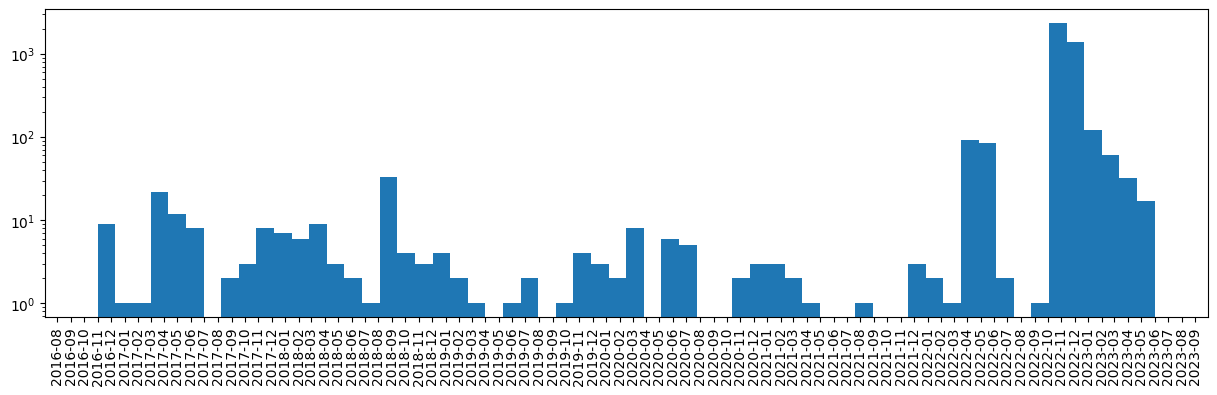

In [177]:
from matplotlib.dates import MonthLocator

## monthly
x = datetime_created

plt.figure(figsize=(15, 4))
unique, count = np.unique(x, return_counts=True)
plt.hist(x, bins=60)

ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [85]:
def mstdn_handler(x):
    return '{}@{}'.format(x['username'], x['instance'])

kuni_users_profiles['mastodon_name'] = kuni_users_profiles.apply(mstdn_handler, axis=1)

In [82]:
toot_created = []
i = 0
datetime_str = ''
for str_date in toots['created_at'].values:
    obj = datetime.datetime.strptime(str_date[:-4], '%Y-%m-%dT%H:%M:%S.')
    toot_created.append(obj)
toots['created_datetime'] = toot_created

In [86]:
toots = toots.merge(kuni_users_profiles, on='mastodon_name')

In [87]:
toots.head()

,Unnamed: 0,id,created_at,in_reply_to_account_id,uri,replies_count,reblogs_count,favourites_count,content,mastodon_name,...,index,username,instance,displayname,twitterhandler,followers,following,created,bio,created_datetime_y
0,0,110547928364675842,2023-06-15T11:12:00.221Z,NaN,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,...,1217,DrAnaQueiros,mastodon.green,DrAnaQueiros,NaN,222,80,2022-11-06T00:00:00.000Z,<p>Mum &amp; benthic and climate change ecolog...,2022-11-06
1,1,109865077222212213,2023-02-14T20:53:58.680Z,NaN,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,...,1217,DrAnaQueiros,mastodon.green,DrAnaQueiros,NaN,222,80,2022-11-06T00:00:00.000Z,<p>Mum &amp; benthic and climate change ecolog...,2022-11-06
2,2,109865065540782373,2023-02-14T20:51:00.433Z,NaN,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,...,1217,DrAnaQueiros,mastodon.green,DrAnaQueiros,NaN,222,80,2022-11-06T00:00:00.000Z,<p>Mum &amp; benthic and climate change ecolog...,2022-11-06
3,3,109822086288418991,2023-02-07T06:40:49.087Z,NaN,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,...,1217,DrAnaQueiros,mastodon.green,DrAnaQueiros,NaN,222,80,2022-11-06T00:00:00.000Z,<p>Mum &amp; benthic and climate change ecolog...,2022-11-06
4,4,109806613521430505,2023-02-04T13:05:53.396Z,NaN,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,...,1217,DrAnaQueiros,mastodon.green,DrAnaQueiros,NaN,222,80,2022-11-06T00:00:00.000Z,<p>Mum &amp; benthic and climate change ecolog...,2022-11-06


In [93]:
def diff(row):
    return row['created_datetime_x'] - row['created_datetime_y']
    
toots['day_diff'] = toots.apply(diff, axis=1)

In [102]:
toots[toots['day_diff'] <= datetime.timedelta(days=1)]['mastodon_name'].unique().size

385

In [103]:
toots[toots['day_diff'] >= datetime.timedelta(days=7)]['mastodon_name'].unique().size

819

In [107]:
toots[toots['day_diff'] >= datetime.timedelta(days=15)]['mastodon_name'].unique().size

1229

In [108]:
toots[toots['day_diff'] >= datetime.timedelta(days=30)]['mastodon_name'].unique().size

1154

In [113]:
ntoots = toots.groupby('mastodon_name')['id'].count()

In [117]:
kuni_users_profiles = kuni_users_profiles.merge(ntoots, on='mastodon_name')

In [185]:
temp = kuni_users_profiles
cols = ['username', 'instance', 'id']
temp = temp[cols]
temp = temp.rename(columns={'id': 'ntoots'})
temp['mastodon_name'] = temp.apply(lambda row: "{}@{}".format(row['username'], row['instance']), axis=1)
temp = temp.drop(columns=['username', 'instance'], axis=1)
temp.head()
temp.to_csv('kuni_ntoots.tsv', sep='\t', index=None)

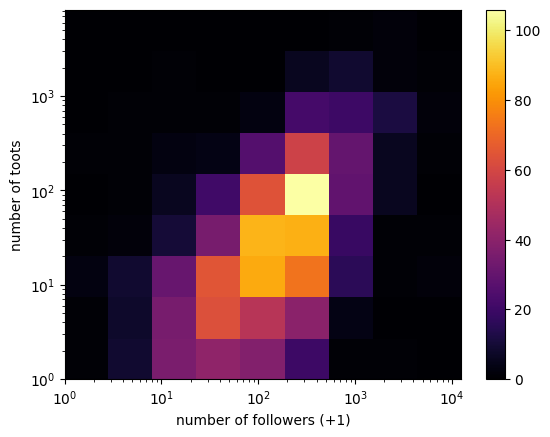

In [136]:
from matplotlib.colors import LogNorm

x = kuni_users_profiles['followers']
y = kuni_users_profiles['id']

xbins = np.logspace(np.log10(min(x)+1), np.log10(max(x)+1), 10)
ybins = np.logspace(np.log10(min(y)), np.log10(max(y)+1), 10)

ax = plt.gca()
ax.set_facecolor("black")
im = ax.hist2d(x, y, bins=(xbins, ybins), cmap='inferno') #vmin=1,vmax=10000))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('number of followers (+1)')
ax.set_ylabel('number of toots')
plt.colorbar(im[3], ax=ax)

In [128]:
plt.show()

In [157]:
# olhar idade academica dos autores
# olhar quantidade de citações
# conferir o que o kuni fez para não fazer igual

authors_fos = pd.read_csv('mastodon_users_wOpenAlex2.csv')
authors_fos['mastodon_name'] = authors_fos.apply(lambda row: row['mastodon_name'][1:], axis=1)

In [158]:
authors_fos

,Unnamed: 0,mastodon_name,OpenAlex_account,x_concepts,id_str
0,74,HelmutBuergmann@mstdn.science,https://openalex.org/A2076598371,"[{'id': 'https://openalex.org/C86803240', 'wik...",806806433404620800
1,170,boshek@fosstodon.org,https://openalex.org/A2114692991,"[{'id': 'https://openalex.org/C86803240', 'wik...",1317009122
2,219,DenisDuboule@mas.to,https://openalex.org/A295410851,"[{'id': 'https://openalex.org/C54355233', 'wik...",1376641550
3,266,paulgkeil@mastodon.world,https://openalex.org/A2061685470,"[{'id': 'https://openalex.org/C15744967', 'wik...",359880812
4,299,rider_jon@zirk.us,https://openalex.org/A2646935175,"[{'id': 'https://openalex.org/C142362112', 'wi...",890826954
...,...,...,...,...,...
4675,71044,gbonillarosso@ecoevo.social,https://openalex.org/A1983618755,"[{'id': 'https://openalex.org/C18903297', 'wik...",3761010562
4676,71118,_dim_ma_@scholar.social,https://openalex.org/A3029061224,"[{'id': 'https://openalex.org/C121332964', 'wi...",405154732
4677,71212,scott_newey@fediscience.org,https://openalex.org/A2059749855,"[{'id': 'https://openalex.org/C18903297', 'wik...",196489143
4678,71334,joshuaiglaser@neuromatch.social,https://openalex.org/A2131887774,"[{'id': 'https://openalex.org/C15744967', 'wik...",979566622728998912


In [144]:
openalex_mastodon = pd.read_csv('authors_mastodon_07-18-2023.tsv', sep='\t')
openalex_mastodon.head()

,id,orcid,display_name,display_name_alternatives,works_count,cited_by_count,most_cited_work,summary_stats,ids,last_known_institution,counts_by_year,x_concepts,works_api_url,updated_date,created_date
0,https://openalex.org/A3104016845,NaN,Catherine M Abbott,[],1,6,The Cajal Embroidery Project: celebrating neur...,"{'2yr_mean_citedness': 0, 'h_index': 1, 'i10_i...",{'openalex': 'https://openalex.org/A3104016845...,NaN,"[{'year': 2021, 'works_count': 0, 'oa_works_co...","[{'id': 'https://openalex.org/C11171543', 'wik...",https://api.openalex.org/works?filter=author.i...,2023-04-18T23:48:47.138844,2020-11-23
1,https://openalex.org/A2668442008,NaN,Aidan Doyle,[],1,0,Galactic Empire Management Consulting: lessons...,"{'2yr_mean_citedness': 0, 'h_index': 0, 'i10_i...",{'openalex': 'https://openalex.org/A2668442008...,NaN,"[{'year': 2016, 'works_count': 1, 'oa_works_co...","[{'id': 'https://openalex.org/C17744445', 'wik...",https://api.openalex.org/works?filter=author.i...,2023-04-19T04:19:11.128451,2017-06-30
2,https://openalex.org/A3000559921,NaN,Zoë Turner,[],1,3,Ethnic disparity in access to the memory asses...,"{'2yr_mean_citedness': 0, 'h_index': 1, 'i10_i...",{'openalex': 'https://openalex.org/A3000559921...,"{'id': 'https://openalex.org/I2802381302', 'ro...","[{'year': 2021, 'works_count': 0, 'oa_works_co...","[{'id': 'https://openalex.org/C15744967', 'wik...",https://api.openalex.org/works?filter=author.i...,2023-04-19T11:59:25.063187,2020-01-23
3,https://openalex.org/A2264054764,NaN,Lilly Evans,[],1,1,Using value networks to boost construction per...,"{'2yr_mean_citedness': 0, 'h_index': 1, 'i10_i...",{'openalex': 'https://openalex.org/A2264054764...,NaN,"[{'year': 2012, 'works_count': 1, 'oa_works_co...","[{'id': 'https://openalex.org/C11012388', 'wik...",https://api.openalex.org/works?filter=author.i...,2023-04-19T01:50:29.687984,2016-06-24
4,https://openalex.org/A3150670573,NaN,Emily Beauparlant,[],1,0,Women do not shy away from competition: Compet...,"{'2yr_mean_citedness': 0, 'h_index': 0, 'i10_i...",{'openalex': 'https://openalex.org/A3150670573...,"{'id': 'https://openalex.org/I100633361', 'ror...","[{'year': 2021, 'works_count': 1, 'oa_works_co...","[{'id': 'https://openalex.org/C15744967', 'wik...",https://api.openalex.org/works?filter=author.i...,2023-04-19T21:37:34.265841,2021-04-13


In [150]:
# to_remove = ['last_known_institution', 'works_api_url', 'updated_date', 'created_date', 'display_name_alternatives', 'orcid']
# openalex_mastodon = openalex_mastodon.drop(axis=1, columns=to_remove)

In [151]:
openalex_mastodon.head()

,id,display_name,works_count,cited_by_count,most_cited_work,summary_stats,ids,counts_by_year,x_concepts
0,https://openalex.org/A3104016845,Catherine M Abbott,1,6,The Cajal Embroidery Project: celebrating neur...,"{'2yr_mean_citedness': 0, 'h_index': 1, 'i10_i...",{'openalex': 'https://openalex.org/A3104016845...,"[{'year': 2021, 'works_count': 0, 'oa_works_co...","[{'id': 'https://openalex.org/C11171543', 'wik..."
1,https://openalex.org/A2668442008,Aidan Doyle,1,0,Galactic Empire Management Consulting: lessons...,"{'2yr_mean_citedness': 0, 'h_index': 0, 'i10_i...",{'openalex': 'https://openalex.org/A2668442008...,"[{'year': 2016, 'works_count': 1, 'oa_works_co...","[{'id': 'https://openalex.org/C17744445', 'wik..."
2,https://openalex.org/A3000559921,Zoë Turner,1,3,Ethnic disparity in access to the memory asses...,"{'2yr_mean_citedness': 0, 'h_index': 1, 'i10_i...",{'openalex': 'https://openalex.org/A3000559921...,"[{'year': 2021, 'works_count': 0, 'oa_works_co...","[{'id': 'https://openalex.org/C15744967', 'wik..."
3,https://openalex.org/A2264054764,Lilly Evans,1,1,Using value networks to boost construction per...,"{'2yr_mean_citedness': 0, 'h_index': 1, 'i10_i...",{'openalex': 'https://openalex.org/A2264054764...,"[{'year': 2012, 'works_count': 1, 'oa_works_co...","[{'id': 'https://openalex.org/C11012388', 'wik..."
4,https://openalex.org/A3150670573,Emily Beauparlant,1,0,Women do not shy away from competition: Compet...,"{'2yr_mean_citedness': 0, 'h_index': 0, 'i10_i...",{'openalex': 'https://openalex.org/A3150670573...,"[{'year': 2021, 'works_count': 1, 'oa_works_co...","[{'id': 'https://openalex.org/C15744967', 'wik..."


In [166]:
# print(kuni_users_profiles.columns)
# print(authors_fos.columns)
to_remove = ['created_datetime', 'id', 'Unnamed: 0', 'id_str', 'username', 'instance', 'created', 'index']

mstd_tt_users = kuni_users_profiles.merge(authors_fos, on=['mastodon_name'])
mstd_tt_users = mstd_tt_users.drop(columns = to_remove, axis=1)

mstd_tt_users.head()

,displayname,twitterhandler,followers,following,bio,mastodon_name,OpenAlex_account,x_concepts
0,Denis Duboule,NaN,342,66,<p>Geneticist in transit. Collège de France/EP...,DenisDuboule@mas.to,https://openalex.org/A295410851,"[{'id': 'https://openalex.org/C54355233', 'wik..."
1,Jon Hughes,"<span class=""h-card""><a href=""https://zirk.us/...",402,842,<p>Academic (Reader in German/Cultural Studies...,rider_jon@zirk.us,https://openalex.org/A2646935175,"[{'id': 'https://openalex.org/C142362112', 'wi..."
2,Magnus Palmblad,"<a href=""https://twitter.com/MagnusPalmblad"" t...",141,119,<p>Scientist. Skeptic. Swede. Not the vegetabl...,magnuspalmblad@fediscience.org,https://openalex.org/A2058370087,"[{'id': 'https://openalex.org/C86803240', 'wik..."
3,João Ohara,NaN,224,147,<p>Theory and Philosophy of History @ Federal ...,ohara@hcommons.social,https://openalex.org/A2284742525,"[{'id': 'https://openalex.org/C138885662', 'wi..."
4,Neil Wright,NaN,56,106,<p>Medical Statistician. Topology and geometry...,neilstats@fediscience.org,https://openalex.org/A2576451780,"[{'id': 'https://openalex.org/C15744967', 'wik..."


In [170]:
mstd_combined = mstd_tt_users.merge(openalex_mastodon, left_on='OpenAlex_account', right_on='id')
to_remove = ['id', 'ids', 'x_concepts_y', 'twitterhandler', 'display_name']
mstd_combined = mstd_combined.drop(columns=to_remove, axis=1)

In [172]:
mstd_combined.head()
mstd_combined.to_csv('kuni_twitter_open_alex_mstd_07-18-2023.tsv', sep='\t')